# Stochastic Gradient Descent

## Model

### Importing Required Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### MNIST Dataset

In [3]:
batch_size = 32
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)   

### Neural Network Model

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()

### Loss Function and Optimizer

In [5]:
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Training Loop

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

### Evaluate the Model on Train Dataset

In [6]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Train Accuracy: {100 * correct / total}%')

Train Accuracy: 100.0%


## Qustions

1. Using the provided code as a reference, implement additional code to compute and print the prediction accuracy on the test dataset.

In [7]:
correct = 0
total = 0
for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 98.43%


2. Initialize and train a new model using each of the specified hyperparam-eter configurations. For each run, plot the training loss versus the number of epochs, and report the training and test accuracies. Each run is expected to complete within 5 to 30 minutes, depending on your computer’s specifications.



- (a) batch size = 32, num epochs = 20, learning rate = 0.1.

Epoch 1/20, Loss: 0.3431
Epoch 2/20, Loss: 0.1171
Epoch 3/20, Loss: 0.0762
Epoch 4/20, Loss: 0.0546
Epoch 5/20, Loss: 0.0413
Epoch 6/20, Loss: 0.0317
Epoch 7/20, Loss: 0.0236
Epoch 8/20, Loss: 0.0172
Epoch 9/20, Loss: 0.0130
Epoch 10/20, Loss: 0.0090
Epoch 11/20, Loss: 0.0065
Epoch 12/20, Loss: 0.0042
Epoch 13/20, Loss: 0.0027
Epoch 14/20, Loss: 0.0016
Epoch 15/20, Loss: 0.0011
Epoch 16/20, Loss: 0.0008
Epoch 17/20, Loss: 0.0007
Epoch 18/20, Loss: 0.0006
Epoch 19/20, Loss: 0.0005
Epoch 20/20, Loss: 0.0005
Train Accuracy: 100.00%
Test Accuracy: 98.33%


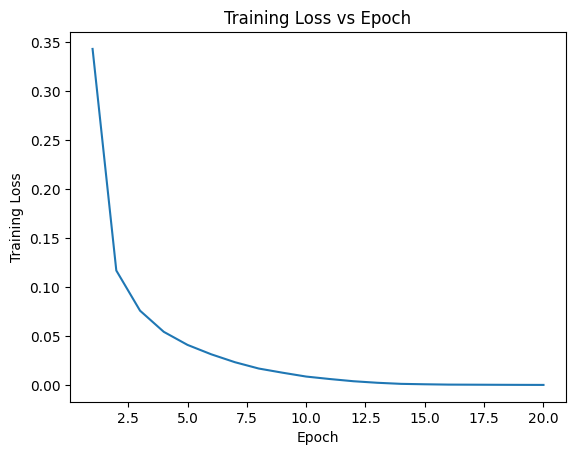

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 32
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Train Accuracy: {train_accuracy:.2f}%')

    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()

- (b) batch size = 32, num epochs = 20, learning rate = 1.

Epoch 1/20, Loss: 0.5971
Epoch 2/20, Loss: 0.2554
Epoch 3/20, Loss: 0.2014
Epoch 4/20, Loss: 0.1794
Epoch 5/20, Loss: 0.1628
Epoch 6/20, Loss: 0.1410
Epoch 7/20, Loss: 0.1569
Epoch 8/20, Loss: 0.1568
Epoch 9/20, Loss: 0.1430
Epoch 10/20, Loss: 0.1334
Epoch 11/20, Loss: 0.1559
Epoch 12/20, Loss: 0.1417
Epoch 13/20, Loss: 0.1400
Epoch 14/20, Loss: 0.1599
Epoch 15/20, Loss: 0.1329
Epoch 16/20, Loss: 0.1290
Epoch 17/20, Loss: 0.1127
Epoch 18/20, Loss: 0.1311
Epoch 19/20, Loss: 0.1147
Epoch 20/20, Loss: 0.1089
Train Accuracy: 97.14%
Test Accuracy: 95.42%


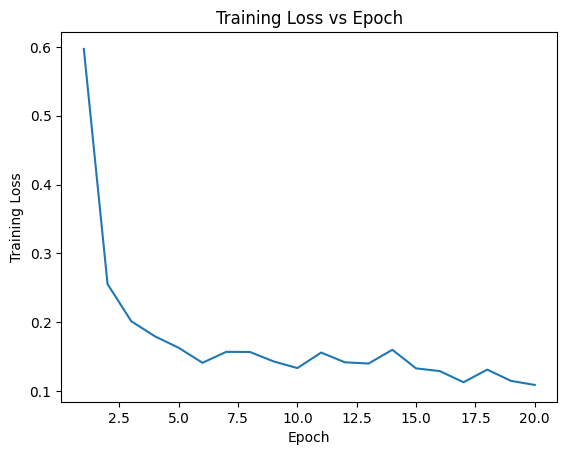

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 32
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

learning_rate = 1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Train Accuracy: {train_accuracy:.2f}%')

    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()

- (c) batch size = 32, num epochs = 20, learning rate = 0.01.

Epoch 1/20, Loss: 1.0539
Epoch 2/20, Loss: 0.3583
Epoch 3/20, Loss: 0.2941
Epoch 4/20, Loss: 0.2544
Epoch 5/20, Loss: 0.2237
Epoch 6/20, Loss: 0.1977
Epoch 7/20, Loss: 0.1757
Epoch 8/20, Loss: 0.1579
Epoch 9/20, Loss: 0.1432
Epoch 10/20, Loss: 0.1304
Epoch 11/20, Loss: 0.1192
Epoch 12/20, Loss: 0.1095
Epoch 13/20, Loss: 0.1005
Epoch 14/20, Loss: 0.0931
Epoch 15/20, Loss: 0.0865
Epoch 16/20, Loss: 0.0805
Epoch 17/20, Loss: 0.0748
Epoch 18/20, Loss: 0.0701
Epoch 19/20, Loss: 0.0649
Epoch 20/20, Loss: 0.0612
Train Accuracy: 98.52%
Test Accuracy: 97.47%


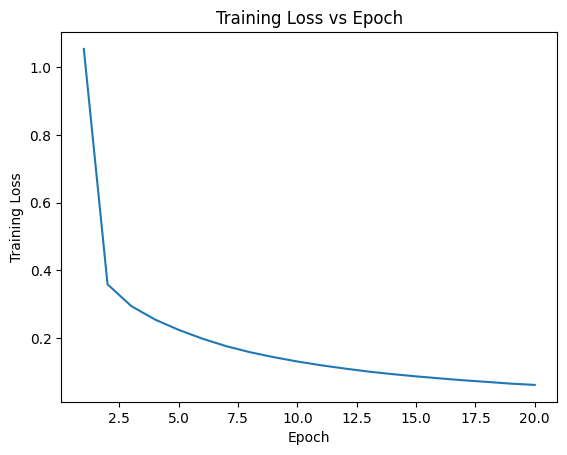

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 32
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Train Accuracy: {train_accuracy:.2f}%')

    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()

- (d) batch size = 8, num epochs = 20, learning rate = 0.1.

Epoch 1/20, Loss: 0.2296
Epoch 2/20, Loss: 0.0920
Epoch 3/20, Loss: 0.0626
Epoch 4/20, Loss: 0.0478
Epoch 5/20, Loss: 0.0360
Epoch 6/20, Loss: 0.0292
Epoch 7/20, Loss: 0.0226
Epoch 8/20, Loss: 0.0180
Epoch 9/20, Loss: 0.0135
Epoch 10/20, Loss: 0.0137
Epoch 11/20, Loss: 0.0175
Epoch 12/20, Loss: 0.0126
Epoch 13/20, Loss: 0.0069
Epoch 14/20, Loss: 0.0076
Epoch 15/20, Loss: 0.0053
Epoch 16/20, Loss: 0.0060
Epoch 17/20, Loss: 0.0113
Epoch 18/20, Loss: 0.0079
Epoch 19/20, Loss: 0.0097
Epoch 20/20, Loss: 0.0051
Train Accuracy: 99.15%
Test Accuracy: 97.80%


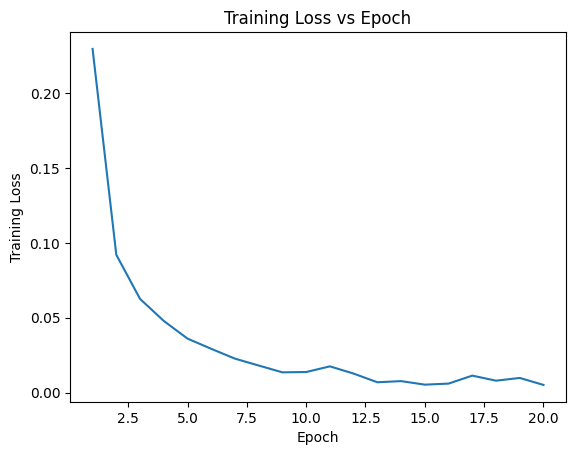

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 8
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Train Accuracy: {train_accuracy:.2f}%')

    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()

- (e) batch size = 128, num epochs = 20, learning rate = 0.1.

Epoch 1/20, Loss: 0.6442
Epoch 2/20, Loss: 0.2531
Epoch 3/20, Loss: 0.1842
Epoch 4/20, Loss: 0.1433
Epoch 5/20, Loss: 0.1156
Epoch 6/20, Loss: 0.0954
Epoch 7/20, Loss: 0.0809
Epoch 8/20, Loss: 0.0694
Epoch 9/20, Loss: 0.0605
Epoch 10/20, Loss: 0.0521
Epoch 11/20, Loss: 0.0456
Epoch 12/20, Loss: 0.0404
Epoch 13/20, Loss: 0.0357
Epoch 14/20, Loss: 0.0308
Epoch 15/20, Loss: 0.0275
Epoch 16/20, Loss: 0.0242
Epoch 17/20, Loss: 0.0214
Epoch 18/20, Loss: 0.0183
Epoch 19/20, Loss: 0.0163
Epoch 20/20, Loss: 0.0144
Train Accuracy: 99.88%
Test Accuracy: 98.03%


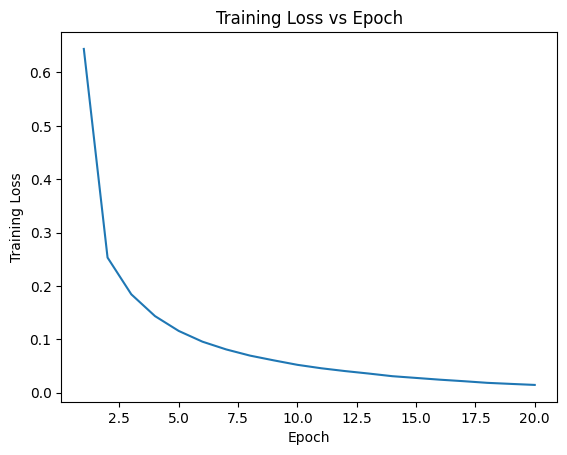

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 128
train_dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Train Accuracy: {train_accuracy:.2f}%')

    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()

3. Analyze the effect of the learning rate on the training process. Specifically, discuss what happens to the training loss when the learning rate is high vs low.

Based on the experiments conducted with different learning rates:

- **Learning Rate = 0.1**:
    - The training loss decreases steadily over the epochs, indicating a stable and effective learning process.
    - The final training loss is low, and both training and test accuracies are high, suggesting good generalization.

- **Learning Rate = 1**:
    - The training loss decreases rapidly initially but shows fluctuations and does not decrease as smoothly as with a lower learning rate.
    - This indicates that a high learning rate can cause the model to overshoot the optimal parameters, leading to instability.
    - Despite the fluctuations, the final training and test accuracies are still high, but the training process is less stable.

- **Learning Rate = 0.01**:
    - The training loss decreases very smoothly and steadily over the epochs.
    - The final training loss is low, and both training and test accuracies are high.
    - A lower learning rate results in a more stable training process, but it may take more epochs to converge compared to a higher learning rate.

In summary, a high learning rate can lead to faster convergence but may cause instability and fluctuations in the training loss. A low learning rate results in a more stable and smooth training process but may require more epochs to achieve similar performance. The choice of learning rate should balance the speed of convergence and the stability of the training process.


4. Analyze the effect of batch size on the training process. Specifically, discuss what happens to the training loss when the batch size is large vs small.

Based on the experiments conducted with different batch sizes:

- **Batch Size = 32**:
    - The training loss decreases steadily over the epochs, indicating a stable and effective learning process.
    - The final training loss is low, and both training and test accuracies are high, suggesting good generalization.
    - This batch size provides a good balance between training stability and computational efficiency.

- **Batch Size = 8**:
    - The training loss decreases steadily but shows more fluctuations compared to larger batch sizes.
    - The final training loss is low, and both training and test accuracies are high.
    - Smaller batch sizes can lead to more noisy updates, which might help in escaping local minima but can also cause instability in the training process.
    - Training with smaller batch sizes is computationally more expensive due to more frequent updates.

- **Batch Size = 128**:
    - The training loss decreases very smoothly and steadily over the epochs.
    - The final training loss is low, and both training and test accuracies are high.
    - Larger batch sizes result in more stable and smooth training processes due to more accurate gradient estimates.
    - However, larger batch sizes require more memory and can be less efficient in terms of convergence speed per epoch.

In summary, smaller batch sizes can lead to more noisy updates and potentially better generalization but at the cost of training stability and computational efficiency. Larger batch sizes provide more stable and smooth training processes but require more memory and may converge slower per epoch. The choice of batch size should balance the stability of the training process, computational efficiency, and memory constraints.